In [100]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt

# ___Associations with Multivariate Quantitative Data___
-------------

In [2]:
# Consider a survey on students of a university
# We measure a set of characteristics
    # BMI
    # Blood pressure
    # Cholestrol level

In [3]:
# Data collected in this survey will be a multivariate quantitative data.
# Multivariate since we have more than one variable.
# Quantitative since the variables are quantitative.

In [4]:
mpg = pd.read_csv(r"./mpg.csv")

In [5]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
# An internal-combustion engine's displacement is the combined volume of air moved
# or displaced — by the pistons in its cylinders.
# In our case, it looks more like a cetegorical variable.

In [7]:
# The following in the above dataset are quantitative variables:
    # mpg -> miles per a gallon
    # weight
    # acceleration

In [8]:
mvquant = mpg.loc[:, ["mpg", "weight", "acceleration"]]

In [9]:
mvquant.head()

,mpg,weight,acceleration
0,18.0,3504,12.0
1,15.0,3693,11.5
2,18.0,3436,11.0
3,16.0,3433,12.0
4,17.0,3449,10.5


## ___Visualizing Multivariate Data with Univariate Histograms___
---------------

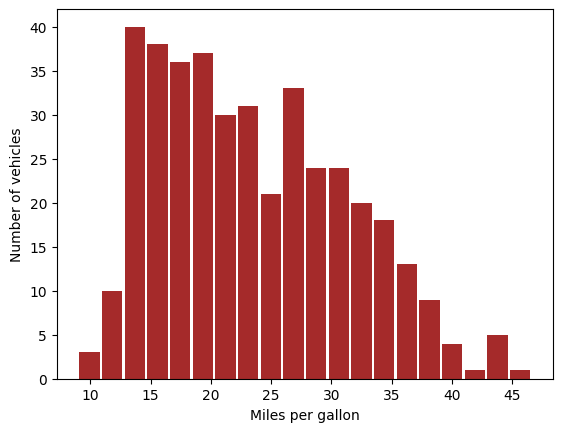

In [10]:
plt.hist(mvquant.mpg, rwidth = 0.9, color = "brown", bins = 20)
plt.xlabel("Miles per gallon")
plt.ylabel("Number of vehicles")
plt.show()

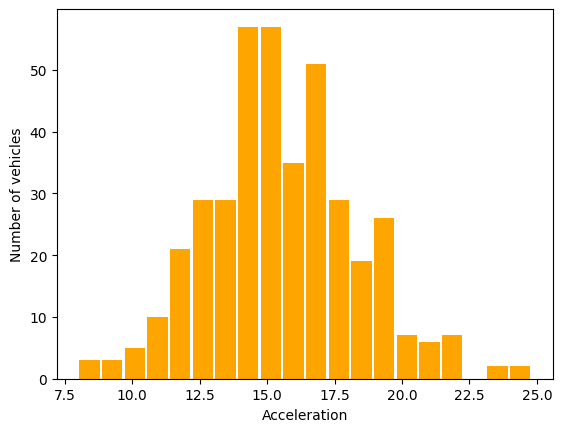

In [11]:
plt.hist(mvquant.acceleration, rwidth = 0.9, color = "orange", bins = 20)
plt.xlabel("Acceleration")
plt.ylabel("Number of vehicles")
plt.show()

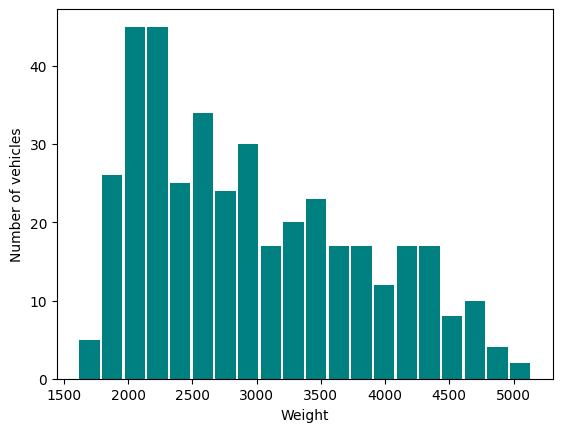

In [12]:
plt.hist(mvquant.weight, rwidth = 0.9, color = "teal", bins = 20)
plt.xlabel("Weight")
plt.ylabel("Number of vehicles")
plt.show()

In [13]:
# With univariate histograms, we can understand the spread, median of the variable.

In [14]:
# But what if we are interested in the association between these two variables?
# How do we examine the relationship between the weight of the vehicle and acceleration?
# Right now, we do not have a way for this.

## ___Scatter plots___
----------------

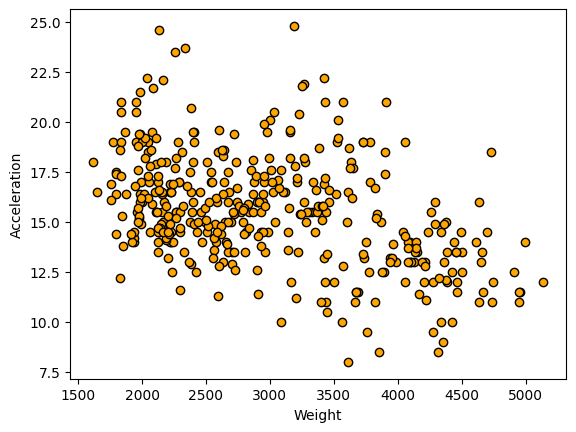

In [15]:
# Scatter plots connect two quantitative variables together.

plt.plot(mvquant.weight, mvquant.acceleration, marker = "o", linestyle = "none", mec = "black", mfc = "orange")
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.show()

In [33]:
# Even though the correlation is not crystal clear, acceleration generally decreases as the vehicles become more heavy.
# Each data point represents a vehicle.

## ___Association Types___
------------------

### ___Linear association___

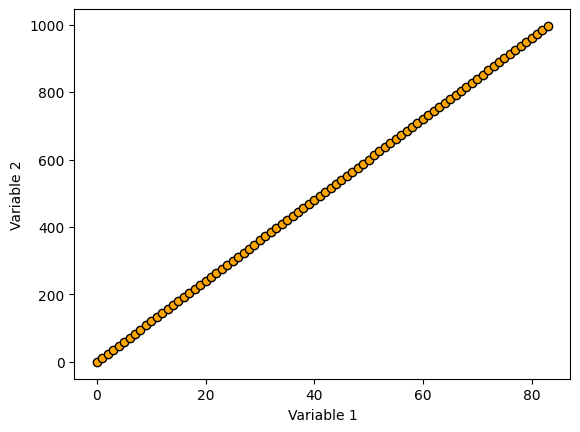

In [54]:
# In linear association, the pattern is a straight line.

x  = np.arange(0, 1000, step = 12) 
plt.plot(x, marker = "o", linestyle = "none", mec = "black", mfc = "orange")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

### ___Quadratic association___

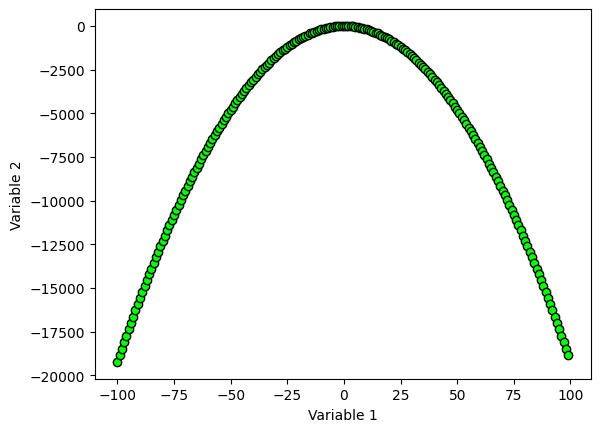

In [23]:
# In quadratic accociation, the pattern is a parabola

m = 0.76897
x = np.arange(-100, 100, step = 1)
y = np.square(x) / -.4 * m

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "lime")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

### ___No association___

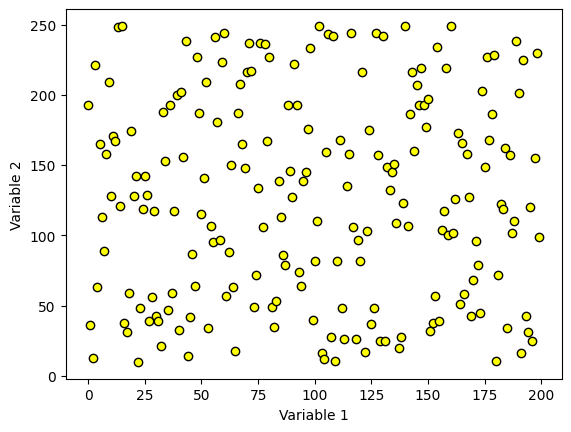

In [22]:
# No pattern of association between the variables (independent of one another)

x = np.arange(0, 200, step = 1)
y = np.random.randint(low = 10, high = 250, size = 200)

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

## ___Direction of Associations___
----------

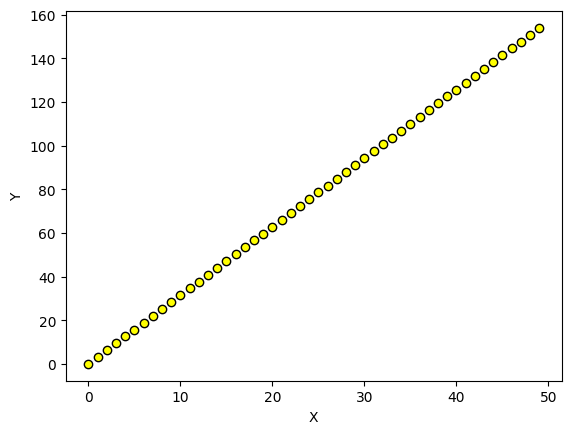

In [28]:
#  Corresponds to the slope of our association.

# An association with a positive slope -> positive linear association.
# where, y increase as x increase

x = np.arange(0, 50, step = 1)
y = np.pi * x

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

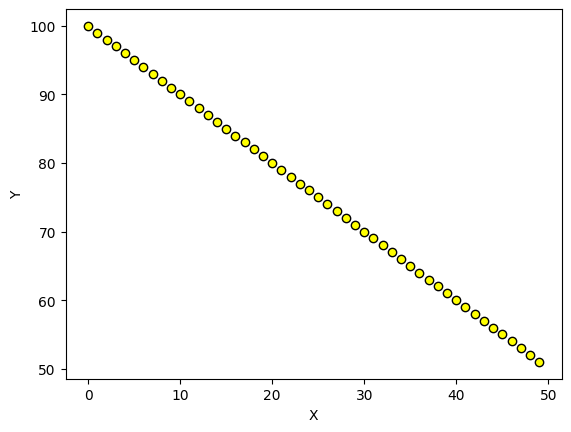

In [30]:
# Negative linear association 
# An association where y decrease as x increase
# A negative slope.

x = np.arange(0, 50, step = 1)
y = np.arange(100, 50, step = -1)

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## ___Strength of Association___
------------

### ___Weak linear association___

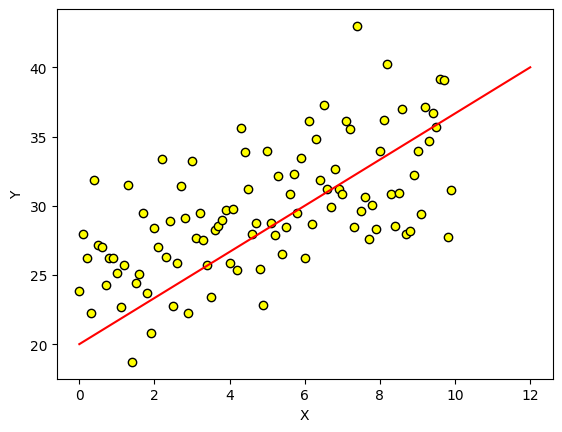

In [71]:
# X and y points somewhat indicate a linear association
# But the association is not strong (there's more entropy in the distribution)

x = np.arange(0, 10, step = .1)
y = x + np.random.normal(loc = 25, scale = 3.5, size = 100)

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.plot([0, 12], [20, 40], color = "red", marker = "none")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### ___Moderate linear association___

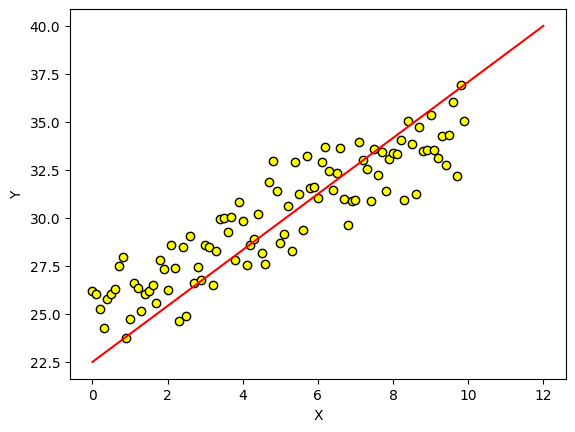

In [81]:
# There's the association is stronger than a weak association, but the entropy is still high.
# (more scattering)

x = np.arange(0, 10, step = .1)
y = x + np.random.normal(loc = 25, scale = 1.25, size = 100)

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.plot([0, 12], [22.5, 40], color = "red", marker = "none")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### ___Strong linear association___

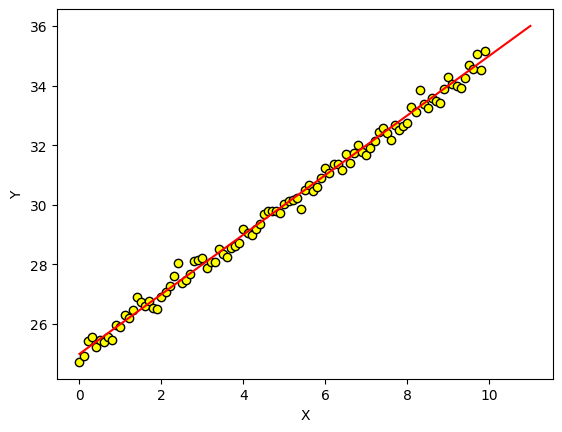

In [97]:
x = np.arange(0, 10, step = .1)
y = x + np.random.normal(loc = 25, scale = .25, size = 100)

plt.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "yellow")
plt.plot([0, 11], [25, 36], color = "red", marker = "none")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [98]:
# Strength of associations does not depend on the direction of associations.

## ___Correlation___
----------

In [99]:
# There's a way to quantify the strength and the direction of the association between two variables.
# This is called the Pearson correlation (R).

# The highest value of Pearson correlation coefficient is 1 or -1
# 0 - no correlation
# The closer it gets to 0, the weaker the correlation is. (in either directions)

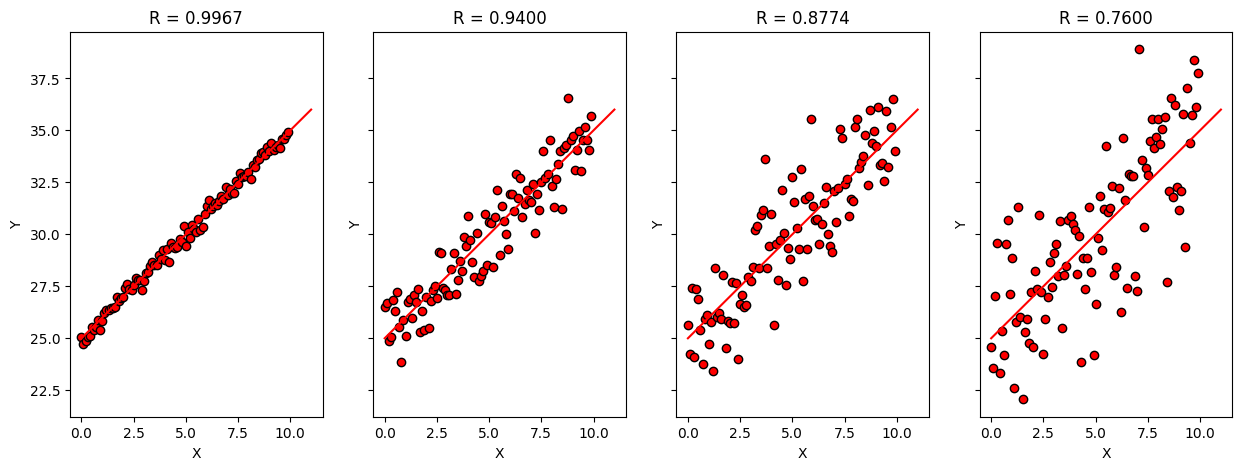

In [119]:
fig, *axes = plt.subplots(nrows = 1, ncols = 4, sharey = True)
fig.set_size_inches(15, 5)
x = np.arange(0, 10, step = .1)
scale = 0.25

for _axes in axes[0]:  
    y = x + np.random.normal(loc = 25, scale = scale, size = 100)
    _axes.plot(x, y, marker = "o", linestyle = "none", mec = "black", mfc = "red")
    _axes.plot([0, 11], [25, 36], color = "red", marker = "none")
    _axes.set_xlabel("X")
    _axes.set_ylabel("Y")
    _axes.set_title(f"R = {stats.pearsonr(x, y)[0]:.4f}")
    scale += 0.75
    
plt.show()

## ___Correlations does not imply causation___
-------------

In [118]:
# Let's say we can see from graphs, that systolic blood pressure of patients increase with age.
# This does not mean that age is the cause for the increase in the systolic blood pressure.

# May be the people with high systolic blood pressure were smokers or substance users.
# May be those were the causes of high SBP.
# May be older people smore more/more frequently.

## ___What to make of outliers?___
----------------

In [120]:
# Outliers are data points that deviate from other data points in a variable.
# In multivariate quantitative data, outliers are data points that strongly deviate from the patterns (associations or correlations)
# in the data.

In [ ]:
# We can include a third variable (categorical / quantitative) in scatter plots to show the relationships with a third
# variable in the form of colours.
# For categorical variable -> a fixedset of colours will do.
# For quantitative variables -> a range based colour palette might help.